In [1]:
import glob
import cv2 
import math

from scipy.linalg import svd
from numpy import linalg as LA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = glob.glob("D:/ML Dataset/Euclidian_distance/RGB/*RGB.png")


In [3]:
# Rading dataset
gray_img = []
for img in path:
    n = cv2.imread(img)
    gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray,(720,1280))
    gray_img.append(gray)

In [4]:

sizeImg = gray_img[0].shape 
sizeImg

(1280, 720)

In [5]:
# Creating a matrix A which contain all images in column

A = np.zeros((sizeImg[0]*sizeImg[1],len(gray_img)))

for i in range(0, len(gray_img)):
    tmp = (np.array(gray_img[i]).reshape(-1))
    A[:,i] = np.array(tmp)
    


In [6]:
A.shape


(921600, 422)

In [7]:
# Finding mean vector

# meanVect = np.zeros((sizeImg[0]*sizeImg[1],1))


# for i in range(0, len(gray_img)):
#     meanVect = meanVect + A[:,i]
    
                        
meanVect = sum(A.T)
        
meanVect = (1/len(gray_img))*meanVect



In [8]:
meanVect

array([198.992891  , 199.16587678, 199.04739336, ..., 119.98341232,
       120.01184834, 119.86729858])

In [9]:


# Subtracking mean value from each columan indivudial

NA = np.zeros((sizeImg[0]*sizeImg[1],len(gray_img)))
                    
for i in range(0, len(gray_img)):
    NA[:,i] = A[:,i] - meanVect 
    

In [10]:
# A_trnspose*A
CoreMat = np.matmul(NA.T,NA)
CoreMat.shape

(422, 422)

In [11]:
# 
eigval, eigvect = LA.eig(CoreMat)


In [12]:

# Sort eigen value and eigen Vectore
ind = np.flip(np.argsort(eigval))

Ds = eigval[ind]
Vs = eigvect[:,ind]


In [13]:
Ds

array([3.88040290e+11, 2.45772941e+11, 9.15051186e+10, 7.81329464e+10,
       6.39190968e+10, 6.02987901e+10, 5.00119359e+10, 4.69818530e+10,
       3.15976965e+10, 2.73521823e+10, 2.33467644e+10, 2.24656742e+10,
       2.15517170e+10, 1.92792357e+10, 1.68063086e+10, 1.38966331e+10,
       1.30117409e+10, 1.27492378e+10, 1.07400211e+10, 1.01625358e+10,
       9.43483179e+09, 9.29786218e+09, 8.82325817e+09, 8.27501946e+09,
       7.98382689e+09, 7.77385542e+09, 7.37442728e+09, 6.84399991e+09,
       6.69592594e+09, 6.20965234e+09, 6.11035537e+09, 5.90944325e+09,
       5.52538211e+09, 5.32061362e+09, 4.90053664e+09, 4.86559496e+09,
       4.75362857e+09, 4.46313935e+09, 4.26339929e+09, 4.09496308e+09,
       4.03090214e+09, 3.96490596e+09, 3.81907360e+09, 3.69563724e+09,
       3.51484507e+09, 3.49244643e+09, 3.36047943e+09, 3.34828797e+09,
       3.25914852e+09, 3.16398629e+09, 3.06928861e+09, 2.98129180e+09,
       2.95749746e+09, 2.91564645e+09, 2.76626335e+09, 2.69581442e+09,
      

In [14]:
sumofDs = np.sum(Ds)
accuracy = 0.90     # 1 -> 100%

tmp =0

for i in range(0,len(Ds)):
    tmp = tmp + Ds[i]
    print (tmp/sumofDs)
    if tmp/sumofDs > accuracy:
        break
        

basisVect = np.matmul(A,Vs[:,0:i+1])

i

# ans = np.resize(basisVect[:,0],(1280,720))
# plt.figure(figsize=(10,10))
# plt.imshow(ans)

0.2321505126874124
0.3791876004534514
0.4339318131999786
0.4806759375434932
0.5189164282317468
0.5549910199405752
0.5849113577387643
0.6130189062218607
0.6319226685993492
0.6482864929217319
0.6622540201705522
0.6756944229506286
0.6885880380543279
0.7001221095500267
0.710176717957617
0.7184905723967262
0.7262750277501105
0.7339024369671326
0.7403278043282416
0.7464076830610894
0.7520522026990955
0.7576147783566021
0.7628934155512721
0.7678440612967766
0.7726204970250266
0.7772713143982479
0.7816831683194386
0.7857776866669844
0.7897836176997878
0.7934986287721889
0.7971542340466092
0.8006896408493935
0.8039952777204974
0.8071784089896018
0.810110223347394
0.8130211333578548
0.8158650579122161
0.8185351932425643
0.8210858312999375
0.8235357000459749
0.8259472434408968
0.8283193037003221
0.8306041177158657
0.8328150842093428
0.8349178892674345
0.8370072940290095
0.8390177476898406
0.8410209076435538
0.8429707386772882
0.8448636375798647
0.8466998822753373
0.8484834816513639
0.850252845731

93

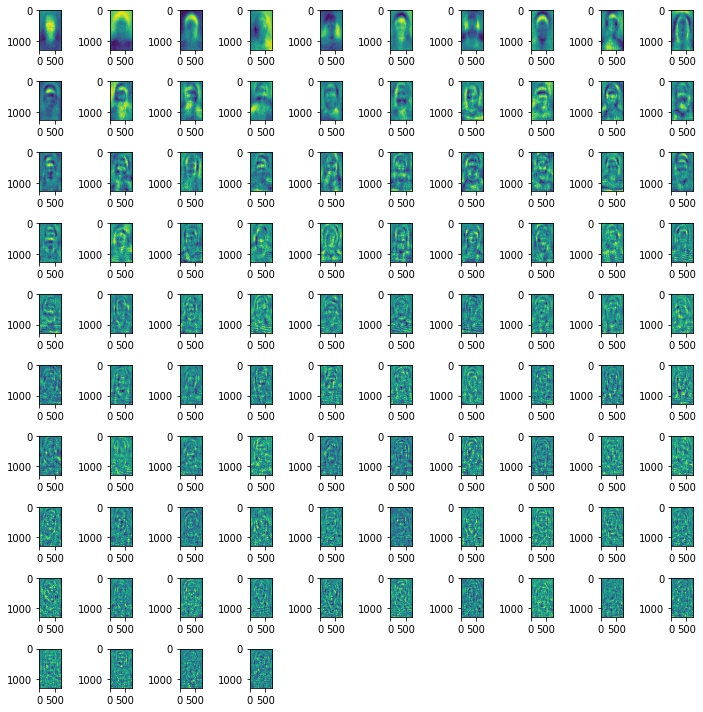

In [15]:
# Eigen Faces

ef = np.zeros((sizeImg[0], sizeImg[1], basisVect.shape[1]))
for i in range(0,basisVect.shape[1]):
     ef[:,:,i] = np.resize(basisVect[:,i],(sizeImg[0],sizeImg[1]))
        
        
x = math.ceil(math.sqrt(basisVect.shape[1]))

plt.figure(figsize=(10,10))

for i in range(0,basisVect.shape[1]):
    plt.subplot(x,x,i+1)
    #img = np.array(ef[:,:,i],dtype=np.uint16)
    img = ef[:,:,i]
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    plt.imshow(img)
    
plt.tight_layout()

In [16]:
basisInv = LA.pinv(basisVect)
weights = np.matmul(basisInv,A)
weights.shape

(94, 422)

# Giving Test Image

In [63]:
#test_img = cv2.imread("D:/ML Dataset/Euclidian_distance/RGB/1641020_Male_Sad_RGB.png")
test_img = cv2.imread("D:/ML Dataset/Euclidian_distance/Sketch/1641020_Male_Fear_Sketch.png")
#test_img = cv2.imread("D:/ML Dataset/ICT_2016_photos/Nildeep Jadav.jpg")

test_gray = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
test_gray = cv2.resize(test_gray,(720,1280))

In [64]:
test_gray.shape

(1280, 720)

In [65]:
# Find weights of Image in terms of PCA

test_col = test_gray.reshape(-1)
W = np.matmul(basisInv,test_col)


In [66]:
err = 0
minval = abs(np.sum(1000000*W))
matchedim = []

print(minval)

index = -999


for i in range(0, len(gray_img)):
    err = sum(np.square(W - weights[:,i]))
    
    if err < minval:
        minval = err
        index = i
        matchedim = np.array(gray_img[i])
        

1326760.1484613388


In [67]:
# plt.imshow(gray_img[index])

0.15680697024713217 



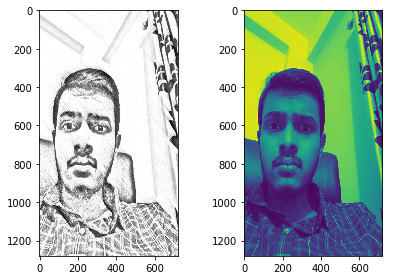

In [68]:
print(minval,"\n")

plt.subplot(1, 2, 1)
plt.imshow(test_img)

plt.subplot(1, 2, 2)
plt.imshow(matchedim)

plt.tight_layout()



### Test Area

In [69]:



# Backward loop

# for i in range(len(Ds)-1,-1,-1):
#     print(i)



# M = np.array([[1,0, 0, 0, 2],
#              [0, 0, 3, 0, 0],
#              [0, 0, 0, 0, 0],
#              [0, 2, 0, 0, 0]])

# M.shape


In [70]:
# U, s, VT = svd(M)
# print(U)
# print("\n")
# print(s)
# print("\n")
# print(VT)

In [71]:

# # #Creating Eigen Vectores and Values and sort them

# magicsquar = np.array([[17, 24,  1,  8, 15],
#        [23,  5,  7, 14, 16],
#        [ 4,  6, 13, 20, 22],
#        [10, 12, 19, 21,  3],
#        [11, 18, 25,  2,  9]])

# arr = np.array([[1, 2,  3,  4, 5],
#        [6,  7,  8, 9, 10],
#        [11,  12, 13, 14, 15],
#        [16, 17, 18, 19,  20],
#        [21, 22, 23,  24,  25]])

# m = sum(arr.T)

# print(arr - m)

# m



# # eigval, eigvect = LA.eig(magicsquar)

# # print(eigval,"\n\n",eigvect)

# # ind = np.flip(np.argsort(eigval))

# # Ds = eigval[ind]
# # Vs = eigvect[:,ind]

# # print(Ds,"\n\n",Vs) 
